# Pandas 基本介绍

Python Data Analysis Library或pandas是基于NumPy的一种工具，该工具是为了解决数据分析任务而创建的。Pandas 纳入了大量库和一些标准的数据模型，提供了高效地操作大型数据集所需的工具。pandas提供了大量能使我们快速便捷地处理数据的函数和方法。


# Pandas 基本数据结构

pandas中有两种常用的基本结构:
* `Series`
    * 一维数组 ，与Numpy中的一维array类似。 二者与Python基本的数据结构Lst也很相近。Series能保存不同种数据类型，字符串、boolean值、 数字等都能保存在Series中。
* ```DataFrame```
    * 二维的表格型数据结构。很多功能与R中的data frame类似。可以将DataFrame理解为Series的容器。 以下的内容主要以DataFrame为主。


In [2]:
import pandas as pd
import numpy as np

# Pandas库的series类型

一维Series可以用以为列表初始化：

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


默认情况下，Series的索引都是数字（可以使用额外参数指定)，类型是统一的。

In [3]:
s = pd.Series([1,3,5,np.nan,6,8], index = ['a','b', 'c', 'd', 'e','f'])
print(s)

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
dtype: float64


## 索引——数据的行标签

In [3]:
s.index # 查看索引

RangeIndex(start=0, stop=6, step=1)

## 值

In [4]:
s.values

array([ 1.,  3.,  5., nan,  6.,  8.])

In [5]:
s[1]

3.0

切片操作

In [6]:
s[2:5]

2    5.0
3    NaN
4    6.0
dtype: float64

In [7]:
s[::2]

0    1.0
2    5.0
4    6.0
dtype: float64

索引赋值

In [8]:
s.index.name = '索引'
s

索引
0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [9]:
s.index = list('abcdef')
s

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
dtype: float64

In [10]:
s['a':'c'] # 包含最后一个元素

a    1.0
b    3.0
c    5.0
dtype: float64

# Pandas 库的 DataFrame 类型

DataFrame是一个二维结构，这里先构造一组时间序列，作为我们第一维的下标：

In [11]:
date = pd.date_range('20180101', periods = 6)
print(date)

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06'],
              dtype='datetime64[ns]', freq='D')


然后创建一个DataFrame结构：

In [17]:
df = pd.DataFrame(np.random.randn(6,4), index = date, columns = list('ABCD'))
df

,A,B,C,D
2018-01-01,-1.944716,-1.030556,-1.438065,-0.515437
2018-01-02,0.504489,1.904339,-0.427702,0.850972
2018-01-03,-0.135849,-1.044801,0.669086,0.821336
2018-01-04,-0.423982,1.182573,0.871278,-2.959956
2018-01-05,1.155809,-1.004425,0.399197,-0.496343
2018-01-06,0.122976,-1.817305,1.212563,-0.447387


默认情况下，如果不指定index参数和colmus，那么它们的值将用从0开始的数字代替。

除了向DataFrame中传入二维数组，我们也可以使用字典传入数据：

In [18]:
df2 = pd.DataFrame({'A':1, 'B':pd.Timestamp('20181001'),'C':pd.Series(1,index = list(range(4)), dtype = float), 'D':np.array([3]*4, dtype = int), 'E':pd.Categorical(["test", "train", "test", "train"]), 'F':'abc'})
df2

,A,B,C,D,E,F
0,1,2018-10-01,1.0,3,test,abc
1,1,2018-10-01,1.0,3,train,abc
2,1,2018-10-01,1.0,3,test,abc
3,1,2018-10-01,1.0,3,train,abc


In [22]:
df2.dtypes # 查看每一列元素数据类型

A             int64
B    datetime64[ns]
C           float64
D             int32
E          category
F            object
dtype: object

字典的每一个key代表一列，其value可以是各种能够转化为Series的对象。

与Series要求所有的类型都一致不同，DateFrame只要求每一列数据的格式相同。

## 查看数据

### 头尾数据

head和tail方法可以分别查看最前面几行和最后面几行的数据（默认为5）

In [19]:
df.head()

,A,B,C,D
2018-01-01,-1.944716,-1.030556,-1.438065,-0.515437
2018-01-02,0.504489,1.904339,-0.427702,0.850972
2018-01-03,-0.135849,-1.044801,0.669086,0.821336
2018-01-04,-0.423982,1.182573,0.871278,-2.959956
2018-01-05,1.155809,-1.004425,0.399197,-0.496343


最后3行：

In [20]:
df.tail(3)

,A,B,C,D
2018-01-04,-0.423982,1.182573,0.871278,-2.959956
2018-01-05,1.155809,-1.004425,0.399197,-0.496343
2018-01-06,0.122976,-1.817305,1.212563,-0.447387


### 下标，列标，数据

下标使用index属性查看：

In [23]:
df.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06'],
              dtype='datetime64[ns]', freq='D')

列标使用columns属性查看：

In [24]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

数据使用values属性查看：

In [25]:
df.values

array([[-1.94471598, -1.03055555, -1.43806498, -0.51543713],
       [ 0.50448949,  1.904339  , -0.4277021 ,  0.85097247],
       [-0.13584903, -1.04480064,  0.66908605,  0.821336  ],
       [-0.42398198,  1.18257315,  0.87127773, -2.95995566],
       [ 1.15580886, -1.00442529,  0.39919691, -0.49634268],
       [ 0.12297605, -1.81730459,  1.21256327, -0.44738707]])

## pandas读取数据及数据操作

我们将以豆瓣的电影数据作为我们深入了解Pandas的一个示例：

In [3]:
df = pd.read_excel('豆瓣电影数据.xlsx')

In [5]:
df.head()

,名字,投票人数,类型,产地,上映时间,时长,年代,评分,首映地点
0,肖申克的救赎,692795.0,剧情/犯罪,美国,1994-09-10 00:00:00,142,1994,9.6,多伦多电影节
1,控方证人,42995.0,剧情/悬疑/犯罪,美国,1957-12-17 00:00:00,116,1957,9.5,美国
2,美丽人生,327855.0,剧情/喜剧/爱情,意大利,1997-12-20 00:00:00,116,1997,9.5,意大利
3,阿甘正传,580897.0,剧情/爱情,美国,1994-06-23 00:00:00,142,1994,9.4,洛杉矶首映
4,霸王别姬,478523.0,剧情/爱情/同性,中国大陆,1993-01-01 00:00:00,171,1993,9.4,香港


### 行操作

In [6]:
df.iloc[0] # 查看第一行数据

名字                   肖申克的救赎
投票人数                 692795
类型                    剧情/犯罪
产地                       美国
上映时间    1994-09-10 00:00:00
时长                      142
年代                     1994
评分                      9.6
首映地点                 多伦多电影节
Name: 0, dtype: object

In [7]:
df.iloc[0:5] # 查看前五行数据，不包含最后一条数据

,名字,投票人数,类型,产地,上映时间,时长,年代,评分,首映地点
0,肖申克的救赎,692795.0,剧情/犯罪,美国,1994-09-10 00:00:00,142,1994,9.6,多伦多电影节
1,控方证人,42995.0,剧情/悬疑/犯罪,美国,1957-12-17 00:00:00,116,1957,9.5,美国
2,美丽人生,327855.0,剧情/喜剧/爱情,意大利,1997-12-20 00:00:00,116,1997,9.5,意大利
3,阿甘正传,580897.0,剧情/爱情,美国,1994-06-23 00:00:00,142,1994,9.4,洛杉矶首映
4,霸王别姬,478523.0,剧情/爱情/同性,中国大陆,1993-01-01 00:00:00,171,1993,9.4,香港


也可以使用loc

In [8]:
df.loc[0:5] # 包含最后一条数据

,名字,投票人数,类型,产地,上映时间,时长,年代,评分,首映地点
0,肖申克的救赎,692795.0,剧情/犯罪,美国,1994-09-10 00:00:00,142,1994,9.6,多伦多电影节
1,控方证人,42995.0,剧情/悬疑/犯罪,美国,1957-12-17 00:00:00,116,1957,9.5,美国
2,美丽人生,327855.0,剧情/喜剧/爱情,意大利,1997-12-20 00:00:00,116,1997,9.5,意大利
3,阿甘正传,580897.0,剧情/爱情,美国,1994-06-23 00:00:00,142,1994,9.4,洛杉矶首映
4,霸王别姬,478523.0,剧情/爱情/同性,中国大陆,1993-01-01 00:00:00,171,1993,9.4,香港
5,泰坦尼克号,157074.0,剧情/爱情/灾难,美国,2012-04-10 00:00:00,194,2012,9.4,中国大陆


#### 添加一行

In [28]:
dit = {'名字':'复仇者联盟3', '投票人数':123456, '类型':'剧情/科幻', '产地': '美国', '上映时间':'2018-05-4 00:00:00', '时长':142, '年代':2018, '评分':np.nan, '首映地点':'美国'}
s = pd.Series(dit)
s.name = 38738
s

名字                  复仇者联盟3
投票人数                123456
类型                   剧情/科幻
产地                      美国
上映时间    2018-05-4 00:00:00
时长                     142
年代                    2018
评分                     NaN
首映地点                    美国
Name: 38738, dtype: object

In [29]:
df = df.append(s)
df[-5:]

,名字,投票人数,类型,产地,上映时间,时长,年代,评分,首映地点
38734,1935年,57.0,喜剧/歌舞,美国,1935-03-15 00:00:00,98,1935,7.6,美国
38735,血溅画屏,95.0,剧情/悬疑/犯罪/武侠/古装,中国大陆,1905-06-08 00:00:00,91,1986,7.1,美国
38736,魔窟中的幻想,51.0,惊悚/恐怖/儿童,中国大陆,1905-06-08 00:00:00,78,1986,8.0,美国
38737,列宁格勒围困之星火战役 Блокада: Фильм 2: Ленинградский ме...,32.0,剧情/战争,苏联,1905-05-30 00:00:00,97,1977,6.6,美国
38738,复仇者联盟3,123456.0,剧情/科幻,美国,2018-05-4 00:00:00,142,2018,NaN,美国


#### 删除一行

In [27]:
df = df.drop([38738])
df[-5:]

,名字,投票人数,类型,产地,上映时间,时长,年代,评分,首映地点
38733,神学院 S,46.0,Adult,法国,1905-06-05 00:00:00,58,1983,8.6,美国
38734,1935年,57.0,喜剧/歌舞,美国,1935-03-15 00:00:00,98,1935,7.6,美国
38735,血溅画屏,95.0,剧情/悬疑/犯罪/武侠/古装,中国大陆,1905-06-08 00:00:00,91,1986,7.1,美国
38736,魔窟中的幻想,51.0,惊悚/恐怖/儿童,中国大陆,1905-06-08 00:00:00,78,1986,8.0,美国
38737,列宁格勒围困之星火战役 Блокада: Фильм 2: Ленинградский ме...,32.0,剧情/战争,苏联,1905-05-30 00:00:00,97,1977,6.6,美国


### 列操作

In [46]:
df.columns # 查看列标

Index(['名字', '投票人数', '类型', '产地', '上映时间', '时长', '年代', '评分', '首映地点'], dtype='object')

In [48]:
df['名字'] # 查看某一列

0                                                   肖申克的救赎
1                                                     控方证人
2                                                    美丽人生 
3                                                     阿甘正传
4                                                     霸王别姬
                               ...                        
38733                                                神学院 S
38734                                                1935年
38735                                                 血溅画屏
38736                                               魔窟中的幻想
38737    列宁格勒围困之星火战役 Блокада: Фильм 2: Ленинградский ме...
Name: 名字, Length: 38738, dtype: object

In [49]:
df[['名字', '类型']] # 查看某几列

,名字,类型
0,肖申克的救赎,剧情/犯罪
1,控方证人,剧情/悬疑/犯罪
2,美丽人生,剧情/喜剧/爱情
3,阿甘正传,剧情/爱情
4,霸王别姬,剧情/爱情/同性
...,...,...
38733,神学院 S,Adult
38734,1935年,喜剧/歌舞
38735,血溅画屏,剧情/悬疑/犯罪/武侠/古装
38736,魔窟中的幻想,惊悚/恐怖/儿童


#### 增加一列

In [13]:
df['序号'] = range(1,len(df)+1)
df

,名字,投票人数,类型,产地,上映时间,时长,年代,评分,首映地点,序号
0,肖申克的救赎,692795.0,剧情/犯罪,美国,1994-09-10 00:00:00,142,1994,9.6,多伦多电影节,1
1,控方证人,42995.0,剧情/悬疑/犯罪,美国,1957-12-17 00:00:00,116,1957,9.5,美国,2
2,美丽人生,327855.0,剧情/喜剧/爱情,意大利,1997-12-20 00:00:00,116,1997,9.5,意大利,3
3,阿甘正传,580897.0,剧情/爱情,美国,1994-06-23 00:00:00,142,1994,9.4,洛杉矶首映,4
4,霸王别姬,478523.0,剧情/爱情/同性,中国大陆,1993-01-01 00:00:00,171,1993,9.4,香港,5
...,...,...,...,...,...,...,...,...,...,...
38733,神学院 S,46.0,Adult,法国,1905-06-05 00:00:00,58,1983,8.6,美国,38734
38734,1935年,57.0,喜剧/歌舞,美国,1935-03-15 00:00:00,98,1935,7.6,美国,38735
38735,血溅画屏,95.0,剧情/悬疑/犯罪/武侠/古装,中国大陆,1905-06-08 00:00:00,91,1986,7.1,美国,38736
38736,魔窟中的幻想,51.0,惊悚/恐怖/儿童,中国大陆,1905-06-08 00:00:00,78,1986,8.0,美国,38737


#### 删除一列

In [14]:
df = df.drop('序号', axis = 1) # axis = 0 代表行，axis = 1代表列

In [15]:
df

,名字,投票人数,类型,产地,上映时间,时长,年代,评分,首映地点
0,肖申克的救赎,692795.0,剧情/犯罪,美国,1994-09-10 00:00:00,142,1994,9.6,多伦多电影节
1,控方证人,42995.0,剧情/悬疑/犯罪,美国,1957-12-17 00:00:00,116,1957,9.5,美国
2,美丽人生,327855.0,剧情/喜剧/爱情,意大利,1997-12-20 00:00:00,116,1997,9.5,意大利
3,阿甘正传,580897.0,剧情/爱情,美国,1994-06-23 00:00:00,142,1994,9.4,洛杉矶首映
4,霸王别姬,478523.0,剧情/爱情/同性,中国大陆,1993-01-01 00:00:00,171,1993,9.4,香港
...,...,...,...,...,...,...,...,...,...
38733,神学院 S,46.0,Adult,法国,1905-06-05 00:00:00,58,1983,8.6,美国
38734,1935年,57.0,喜剧/歌舞,美国,1935-03-15 00:00:00,98,1935,7.6,美国
38735,血溅画屏,95.0,剧情/悬疑/犯罪/武侠/古装,中国大陆,1905-06-08 00:00:00,91,1986,7.1,美国
38736,魔窟中的幻想,51.0,惊悚/恐怖/儿童,中国大陆,1905-06-08 00:00:00,78,1986,8.0,美国


#### 通过标签选择数据

In [16]:
df.loc[1, '名字'] # 选择一个数据

'控方证人'

In [17]:
df.loc[[1,3,5,7,9], ['名字', '评分']] # 选择多行多列

,名字,评分
1,控方证人,9.5
3,阿甘正传,9.4
5,泰坦尼克号,9.4
7,新世纪福音战士剧场版：Air/真心为你 新世紀エヴァンゲリオン劇場版 Ai,9.4
9,这个杀手不太冷,9.4


### 条件选择

#### 选取产地为美国的所有电影

In [18]:
df[df['产地'] == '美国'][:5] # 这里我们只查看前5行

,名字,投票人数,类型,产地,上映时间,时长,年代,评分,首映地点
0,肖申克的救赎,692795.0,剧情/犯罪,美国,1994-09-10 00:00:00,142,1994,9.6,多伦多电影节
1,控方证人,42995.0,剧情/悬疑/犯罪,美国,1957-12-17 00:00:00,116,1957,9.5,美国
3,阿甘正传,580897.0,剧情/爱情,美国,1994-06-23 00:00:00,142,1994,9.4,洛杉矶首映
5,泰坦尼克号,157074.0,剧情/爱情/灾难,美国,2012-04-10 00:00:00,194,2012,9.4,中国大陆
6,辛德勒的名单,306904.0,剧情/历史/战争,美国,1993-11-30 00:00:00,195,1993,9.4,华盛顿首映


#### 选取产地为美国的所有电影，并且评分大于9分的电影

In [19]:
df[(df.产地 == '美国') & (df.评分 > 9)]

,名字,投票人数,类型,产地,上映时间,时长,年代,评分,首映地点
0,肖申克的救赎,692795.0,剧情/犯罪,美国,1994-09-10 00:00:00,142,1994,9.6,多伦多电影节
1,控方证人,42995.0,剧情/悬疑/犯罪,美国,1957-12-17 00:00:00,116,1957,9.5,美国
3,阿甘正传,580897.0,剧情/爱情,美国,1994-06-23 00:00:00,142,1994,9.4,洛杉矶首映
5,泰坦尼克号,157074.0,剧情/爱情/灾难,美国,2012-04-10 00:00:00,194,2012,9.4,中国大陆
6,辛德勒的名单,306904.0,剧情/历史/战争,美国,1993-11-30 00:00:00,195,1993,9.4,华盛顿首映
...,...,...,...,...,...,...,...,...,...
37951,欢乐树的朋友们：赶尽杀绝,4151.0,喜剧/动画,美国,2005-11-28 00:00:00,84,2005,9.2,美国
38119,山那边,70.0,剧情,美国,1975-11-14 00:00:00,103,1975,9.1,美国
38452,奎,62.0,纪录片/短片,美国,2015-08-19 00:00:00,9,2015,9.1,纽约电影论坛
38465,十二怒汉,466.0,剧情/悬疑/犯罪,美国,1954-09-20 00:00:00,52,1954,9.3,美国


#### 选取产地为美国或中国大陆的所有电影，并且评分大于9分

In [20]:
df[((df.产地=='美国')|(df.产地=='中国大陆'))&(df.评分>9)]

,名字,投票人数,类型,产地,上映时间,时长,年代,评分,首映地点
0,肖申克的救赎,692795.0,剧情/犯罪,美国,1994-09-10 00:00:00,142,1994,9.6,多伦多电影节
1,控方证人,42995.0,剧情/悬疑/犯罪,美国,1957-12-17 00:00:00,116,1957,9.5,美国
3,阿甘正传,580897.0,剧情/爱情,美国,1994-06-23 00:00:00,142,1994,9.4,洛杉矶首映
4,霸王别姬,478523.0,剧情/爱情/同性,中国大陆,1993-01-01 00:00:00,171,1993,9.4,香港
5,泰坦尼克号,157074.0,剧情/爱情/灾难,美国,2012-04-10 00:00:00,194,2012,9.4,中国大陆
...,...,...,...,...,...,...,...,...,...
37951,欢乐树的朋友们：赶尽杀绝,4151.0,喜剧/动画,美国,2005-11-28 00:00:00,84,2005,9.2,美国
38119,山那边,70.0,剧情,美国,1975-11-14 00:00:00,103,1975,9.1,美国
38452,奎,62.0,纪录片/短片,美国,2015-08-19 00:00:00,9,2015,9.1,纽约电影论坛
38465,十二怒汉,466.0,剧情/悬疑/犯罪,美国,1954-09-20 00:00:00,52,1954,9.3,美国


### 缺失值及异常值处理

#### 缺失值处理方法

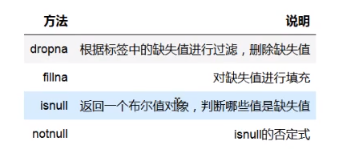

#### 判断缺失值

In [21]:
df.isnull()

,名字,投票人数,类型,产地,上映时间,时长,年代,评分,首映地点
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
38733,False,False,False,False,False,False,False,False,False
38734,False,False,False,False,False,False,False,False,False
38735,False,False,False,False,False,False,False,False,False
38736,False,False,False,False,False,False,False,False,False


In [4]:
df[df['名字'].isnull()] # 查看电影名称缺失的数据

,名字,投票人数,类型,产地,上映时间,时长,年代,评分,首映地点
231,NaN,144.0,纪录片/音乐,韩国,2011-02-02 00:00:00,90,2011,9.7,美国
361,NaN,80.0,短片,其他,1905-05-17 00:00:00,4,1964,5.7,美国
369,NaN,5315.0,剧情,日本,2004-07-10 00:00:00,111,2004,7.5,日本
372,NaN,263.0,短片/音乐,英国,1998-06-30 00:00:00,34,1998,9.2,美国
374,NaN,47.0,短片,其他,1905-05-17 00:00:00,3,1964,6.7,美国
...,...,...,...,...,...,...,...,...,...
38523,NaN,2190.0,动作/恐怖/战争,日本,1905-06-27 00:00:00,85,2005,7.0,美国
38555,NaN,32.0,纪录片,美国,1905-06-19 00:00:00,88,1997,8.1,美国
38560,NaN,49.0,纪录片/音乐,美国,2004-09-25 00:00:00,107,2004,8.4,美国
38643,NaN,62.0,恐怖,美国,2003-12-30 00:00:00,90,2003,5.2,美国


In [23]:
df[df['名字'].notnull()] # 查看电影名称非缺失的数据

,名字,投票人数,类型,产地,上映时间,时长,年代,评分,首映地点
0,肖申克的救赎,692795.0,剧情/犯罪,美国,1994-09-10 00:00:00,142,1994,9.6,多伦多电影节
1,控方证人,42995.0,剧情/悬疑/犯罪,美国,1957-12-17 00:00:00,116,1957,9.5,美国
2,美丽人生,327855.0,剧情/喜剧/爱情,意大利,1997-12-20 00:00:00,116,1997,9.5,意大利
3,阿甘正传,580897.0,剧情/爱情,美国,1994-06-23 00:00:00,142,1994,9.4,洛杉矶首映
4,霸王别姬,478523.0,剧情/爱情/同性,中国大陆,1993-01-01 00:00:00,171,1993,9.4,香港
...,...,...,...,...,...,...,...,...,...
38733,神学院 S,46.0,Adult,法国,1905-06-05 00:00:00,58,1983,8.6,美国
38734,1935年,57.0,喜剧/歌舞,美国,1935-03-15 00:00:00,98,1935,7.6,美国
38735,血溅画屏,95.0,剧情/悬疑/犯罪/武侠/古装,中国大陆,1905-06-08 00:00:00,91,1986,7.1,美国
38736,魔窟中的幻想,51.0,惊悚/恐怖/儿童,中国大陆,1905-06-08 00:00:00,78,1986,8.0,美国


#### 填充缺失值

In [5]:
df[df['投票人数'].isnull()] # 查看投票人数缺失的数据

,名字,投票人数,类型,产地,上映时间,时长,年代,评分,首映地点


In [6]:
df[df['评分'].isnull()] # 查看电影时长缺失的数据

,名字,投票人数,类型,产地,上映时间,时长,年代,评分,首映地点


In [8]:
df['评分'].fillna(np.mean(df['评分']), inplace=True) # 填充电影评分的均值
df[-5:]

,名字,投票人数,类型,产地,上映时间,时长,年代,评分,首映地点
38733,神学院 S,46.0,Adult,法国,1905-06-05 00:00:00,58,1983,8.6,美国
38734,1935年,57.0,喜剧/歌舞,美国,1935-03-15 00:00:00,98,1935,7.6,美国
38735,血溅画屏,95.0,剧情/悬疑/犯罪/武侠/古装,中国大陆,1905-06-08 00:00:00,91,1986,7.1,美国
38736,魔窟中的幻想,51.0,惊悚/恐怖/儿童,中国大陆,1905-06-08 00:00:00,78,1986,8.0,美国
38737,列宁格勒围困之星火战役 Блокада: Фильм 2: Ленинградский ме...,32.0,剧情/战争,苏联,1905-05-30 00:00:00,97,1977,6.6,美国


In [34]:
df1=df.fillna('未知电影') # 把所有空值都填充为 未知电影

In [35]:
df1[df1.名字.isnull()][:10]

,名字,投票人数,类型,产地,上映时间,时长,年代,评分,首映地点


#### 删除缺失值

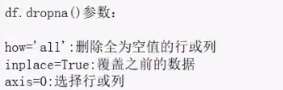

In [7]:
len(df)

38738

In [11]:
df2=df.dropna()

In [12]:
len(df2)

38175

#### 处理异常值

异常值,即在数据集中存在不合理的值,又称离群点。比如年龄为-1 ,笔记本电脑重量为1吨等,都属于异常值的范围。`

In [13]:
df[df.投票人数<0]

,名字,投票人数,类型,产地,上映时间,时长,年代,评分,首映地点
19777,皇家大贼 皇家大,-80.0,剧情/犯罪,中国香港,1985-05-31 00:00:00,60,1985,6.3,美国
19786,日本的垃圾去中国大陆 にっぽんの“ゴミ” 大陆へ渡る ～中国式リサイクル錬,-80.0,纪录片,日本,1905-06-26 00:00:00,60,2004,7.9,美国
19797,女教徒,-118.0,剧情,法国,1966-05-06 00:00:00,135,1966,7.8,美国


In [14]:
df[df['投票人数']%1 != 0]

,名字,投票人数,类型,产地,上映时间,时长,年代,评分,首映地点
19791,女教师 女教,8.30,剧情/犯罪,日本,1977-10-29 00:00:00,100,1977,6.6,日本
19804,女郎漫游仙境 ドレミファ娘の血は騒,5.90,喜剧/歌舞,日本,1985-11-03 00:00:00,80,1985,6.7,日本
19820,女仆日记,12.87,剧情,法国,2015-04-01 00:00:00,96,2015,5.7,法国
38055,逃出亚卡拉,12.87,剧情/动作/惊悚/犯罪,美国,1979-09-20 00:00:00,112,1979,7.8,美国


In [15]:
df = df[df['投票人数']>0]
df = df[df['投票人数']%1==0]

对于异常值,一般来说数量都会很少,在不影响整体数据分布的情况下,我们直接删除就可以了。

### 数据保存

数据处理后，将数据重新保存到movie_data.xlsx

In [17]:
df.to_excel('movie_data.xlsx')